# MLG 382 Project
### <b><u>Team members:</u></b>
- Leander Botha (578404)
- George Hammond (577175)
- Willem Engelbrecht (578334)
- Juanro Minne (577195)

# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

classes: 4
['elephant', 'giraffe', 'lion', 'zebra']


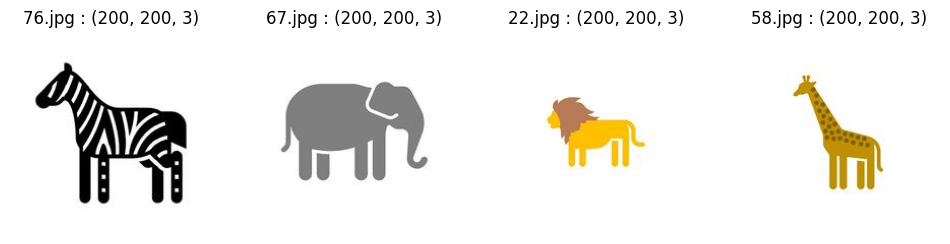

In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# change the data_path to match the location of the images
data_path = "safari/training"

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print( 'classes:',len(classes))
print(classes)

# Showing the first image in each folder as an image sample
fig = plt.figure(figsize=(12, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [2]:
!pip install --upgrade tensorflow

In [3]:
# Install TensorFlow using pip
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models

2023-05-22 17:08:39.058023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 17:08:39.187289: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-22 17:08:39.187327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-22 17:08:39.228515: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-22 17:08:40.664041: W tensorflow/stream_executor/platform/de

# Preparing training and test set

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (200,200)
batch_size = 30

datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation 70/30 split

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_gen = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_gen.class_indices.keys())
print('Data is ready')

Found 280 images belonging to 4 classes.
Found 116 images belonging to 4 classes.
Data is ready


### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [5]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as layers running in a sequence 
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_gen.image_shape, activation='relu'))

# Max pooling layer (2x2 patch)
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout layer
model.add(Dropout(0.2))

# Flatten feature map/output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_gen.num_classes, activation='softmax'))

# Compile the model for categorical classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


2023-05-22 17:08:42.937391: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-22 17:08:42.937423: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-22 17:08:42.937459: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-2f75b99e-9b87-412c-acb0-a141b81ca533): /proc/driver/nvidia/version does not exist
2023-05-22 17:08:42.937658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
________________________________________________________________

### Train the model
Train a CNN model with 10 epochs.

In [6]:
# Your Code to train a CNN model...
num_epochs = 10  #declare number of epochs
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // batch_size,
    validation_data = validation_gen, 
    validation_steps = validation_gen.samples // batch_size,
    epochs = num_epochs)


Epoch 1/10
9/9 [==============================] - 38s 4s/step - loss: 1.5303 - accuracy: 0.2520 - val_loss: 1.1973 - val_accuracy: 0.4444
Epoch 2/10
9/9 [==============================] - 35s 4s/step - loss: 0.9540 - accuracy: 0.6600 - val_loss: 0.8873 - val_accuracy: 0.6556
Epoch 3/10
9/9 [==============================] - 36s 4s/step - loss: 0.6395 - accuracy: 0.7800 - val_loss: 0.2450 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 37s 4s/step - loss: 0.2086 - accuracy: 0.9148 - val_loss: 0.4947 - val_accuracy: 0.6333
Epoch 5/10
9/9 [==============================] - 35s 4s/step - loss: 0.2339 - accuracy: 0.9280 - val_loss: 0.0470 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 37s 4s/step - loss: 0.1096 - accuracy: 0.9667 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 35s 4s/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==================

### View loss history
- To check for overfitting.

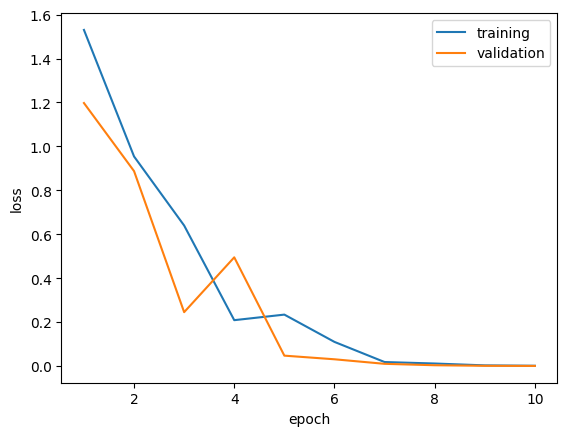

In [7]:

%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluate the model

1/1 [==============================] - 1s 1s/step


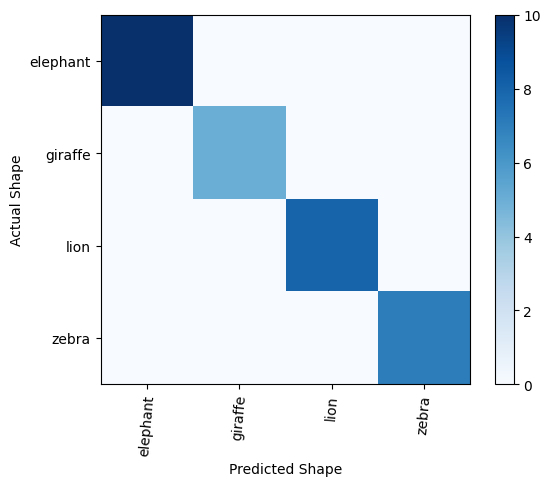

In [8]:
# image and label arrays for validation data
Xtest = validation_gen[0][0]
Ytest = validation_gen[0][1]
# Predicting the class
class_probabilities = model.predict(Xtest)

# The model returns a probability value for each class
# highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The labels are hot encoded
true_labels = np.argmax(Ytest, axis=1)

# Plotting the confusion matrix
CFmatrix = confusion_matrix(true_labels, predictions)
plt.imshow(CFmatrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

### Save your model

Add code below to save your model's trained weights.

In [9]:
# Saving the model
Savedmodel = 'ourModel.h5'
model.save(Savedmodel)
del model  # deletes the existing model variable
print('The model is saved as:', Savedmodel)

The model is saved as: ourModel.h5


### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 0s 22ms/step


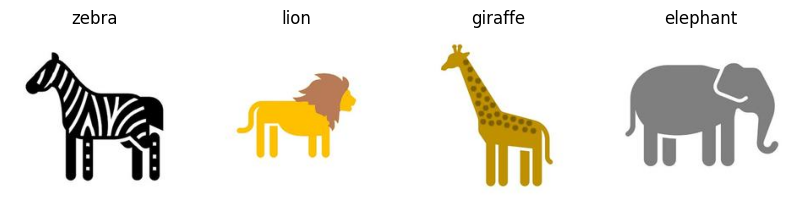

In [11]:
# Your code here
# Predicting the class of an image
from tensorflow.keras import models
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # Input format needs to match training data
    # The generator loades the values as floating point numbers
    # and normalised the pixel values
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # predicting the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index


model = models.load_model(Savedmodel) # loads the saved model

# The images are in the data/shapes folder
test_data_path = 'safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(10, 15))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()

Hopefully, your model predicted all four of the image classes correctly!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f75b99e-9b87-412c-acb0-a141b81ca533' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>